### Imports

In [45]:
import os
import pickle
import matplotlib.pyplot as plt

from skimage.util import invert
from skimage import io, color, morphology, segmentation

### Functions

In [46]:
def grey_image_transform(image):
    return color.rgb2gray(image)

def binarize_image(image):
    thresh = threshold_otsu(image)
    image = image > thresh
    return image

def get_image_edges(image):
    image = grey_image_transform(image)
    image = binarize_image(image)
    image = invert(image)
    edges = filters.sobel(image)
    edges = binarize_image(edges)
    return edges

def get_pillow_image_edges(image):
    image = image.convert("L")    # Converting Image to Gray
    edges = image.filter(ImageFilter.FIND_EDGES)
    edges = np.array(edges)
    edges = binarize_image(edges)
    return edges

def plot_images(image, chull):
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    ax = axes.ravel()

    ax[0].set_title('Original picture')
    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_axis_off()

    ax[1].set_title('Transformed picture')
    ax[1].imshow(chull, cmap=plt.cm.gray)
    ax[1].set_axis_off()

    plt.tight_layout()
    plt.show()  

def display_result(img, mask, slic, m_slic):
    # Display result
    fig, ax_arr = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 10))
    ax1, ax2, ax3, ax4 = ax_arr.ravel()

    ax1.imshow(img)
    ax1.set_title('Original image')

    ax2.imshow(mask, cmap='gray')
    ax2.set_title('Mask')

    ax3.imshow(segmentation.mark_boundaries(img, slic))
    ax3.contour(mask, colors='red', linewidths=1)
    ax3.set_title('SLIC')

    ax4.imshow(segmentation.mark_boundaries(img, m_slic))
    ax4.contour(mask, colors='red', linewidths=1)
    ax4.set_title('maskSLIC')

    for ax in ax_arr.ravel():
        ax.set_axis_off()

    plt.tight_layout()
    plt.show()

### Read Data and Get Mask Information

In [47]:
input_dir = './../../data/images/'
output_dir = './../../data/results/img_processing/'

In [60]:
i

1.0

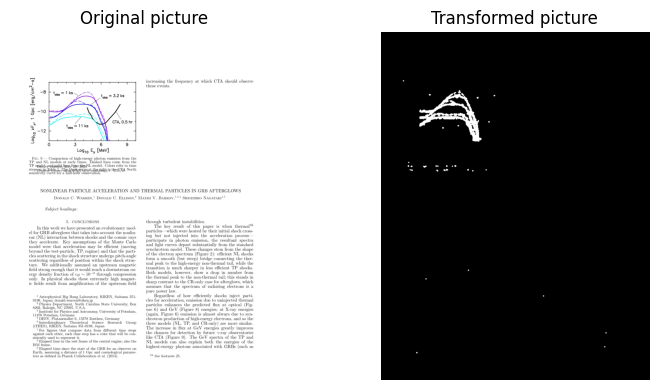

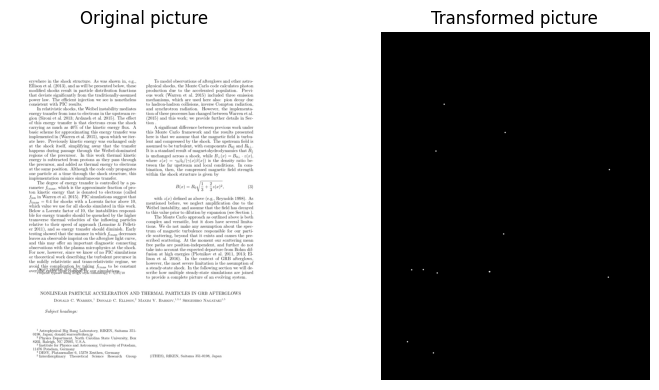

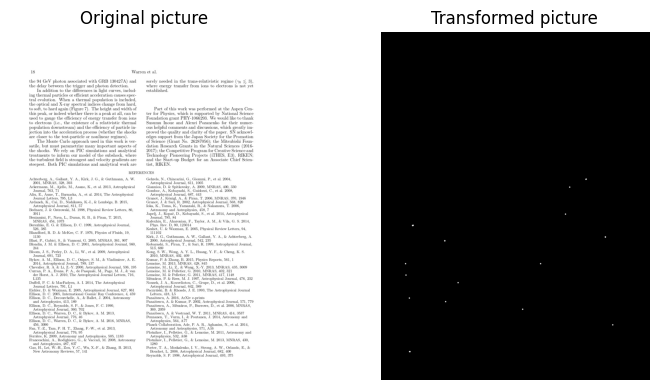

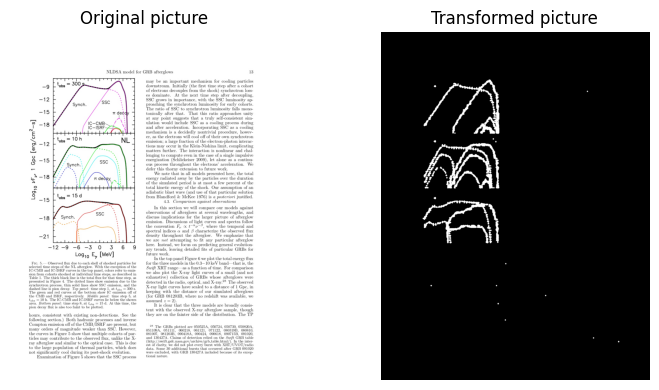

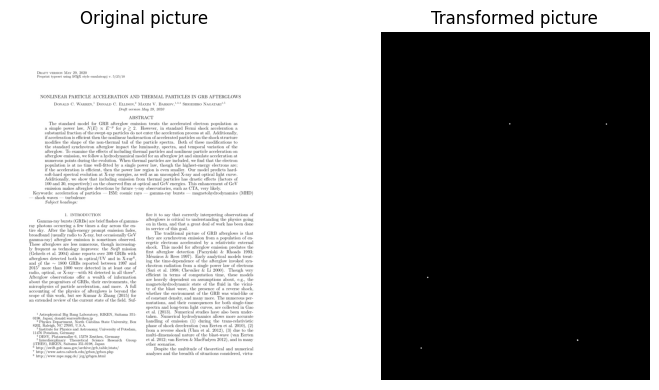

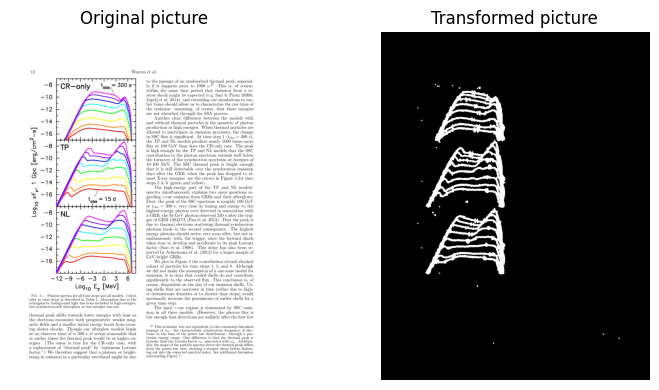

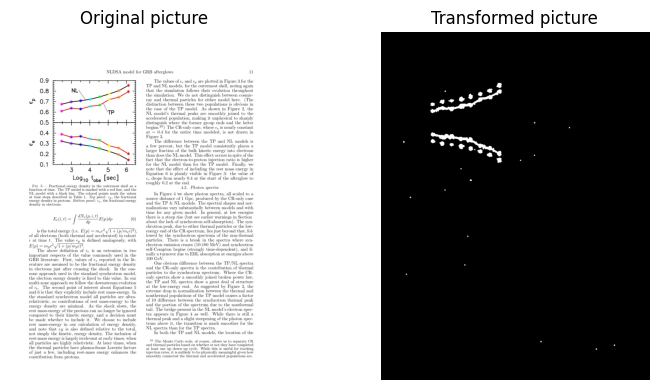

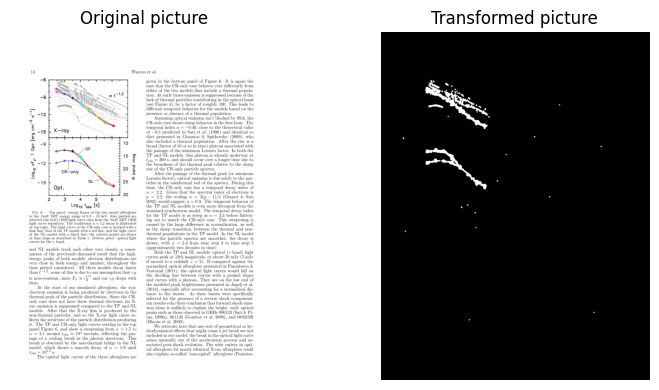

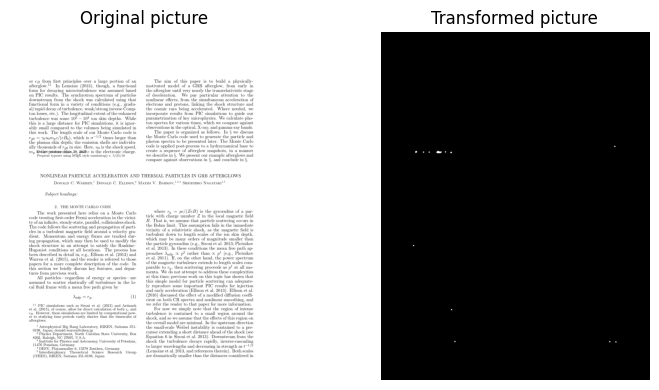

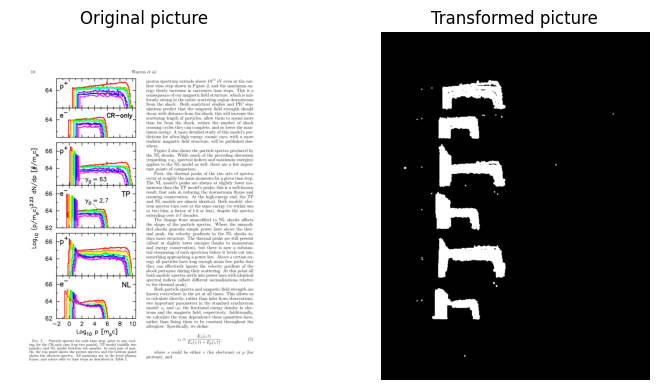

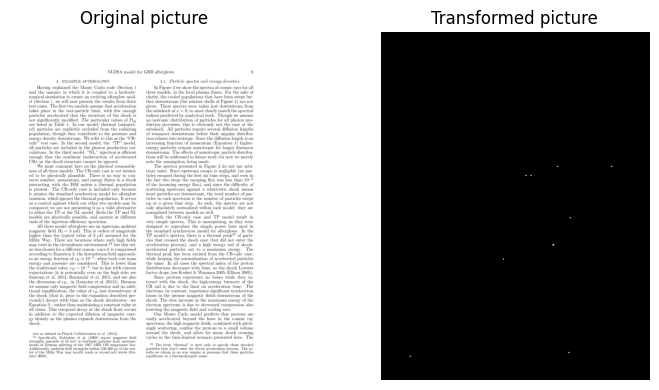

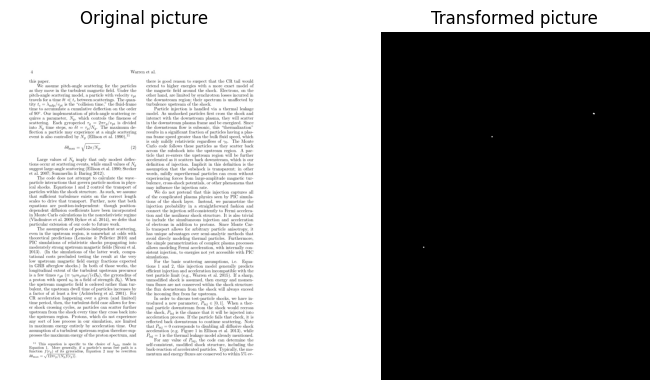

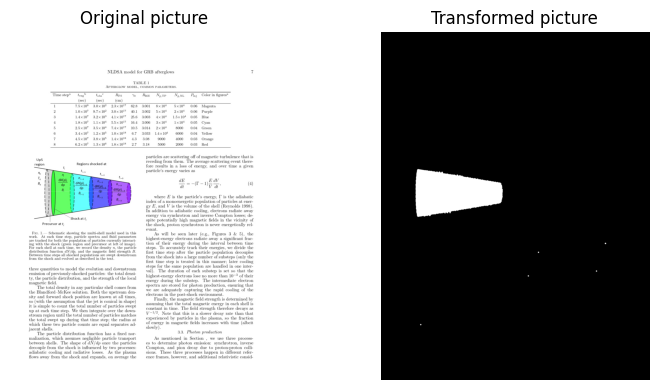

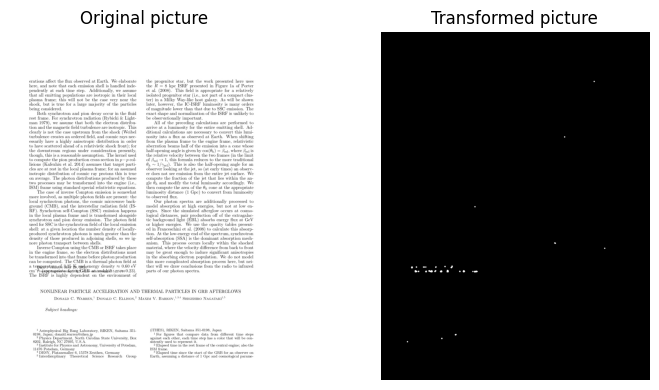

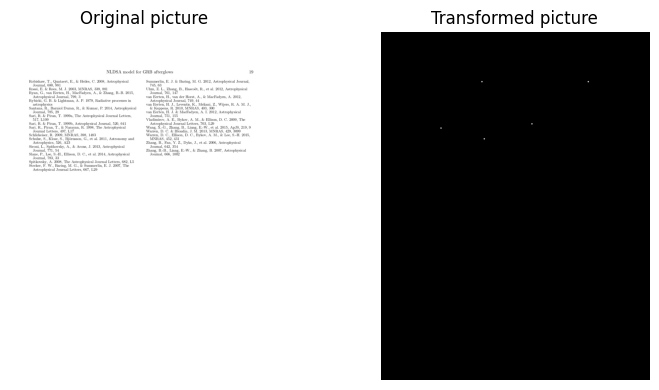

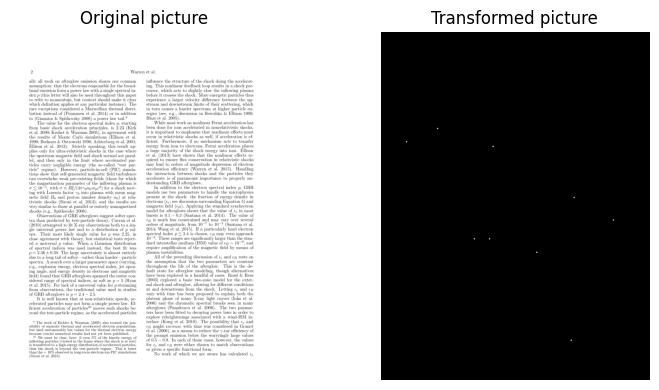

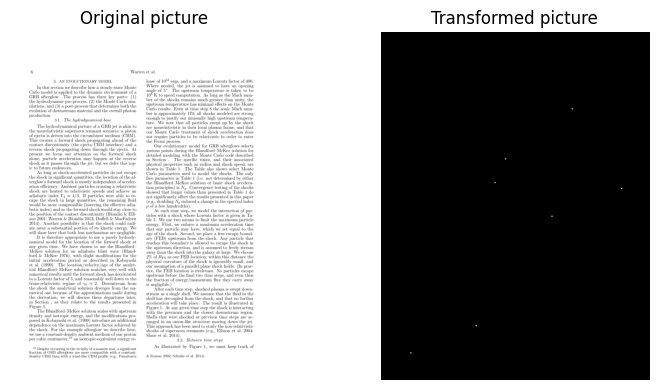

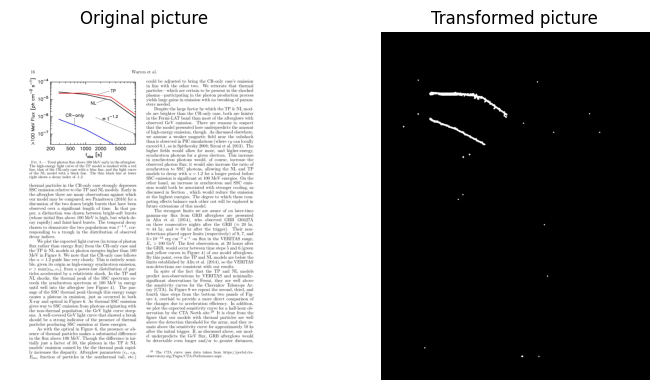

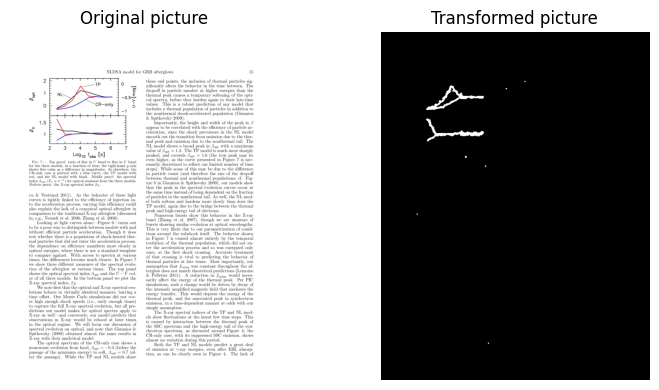

In [61]:
dir_list = os.listdir(input_dir)
results = {}

for image in dir_list:
    img = io.imread(input_dir + image)
#     mask = get_image_edges(img)
    lum = color.rgb2gray(img)
    mask = morphology.remove_small_holes(morphology.remove_small_objects(lum < 1.0,4),4)
    mask = morphology.opening(mask, morphology.disk(3))
    results[image] = mask
    plot_images(img,mask)

0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
Success :  1.0


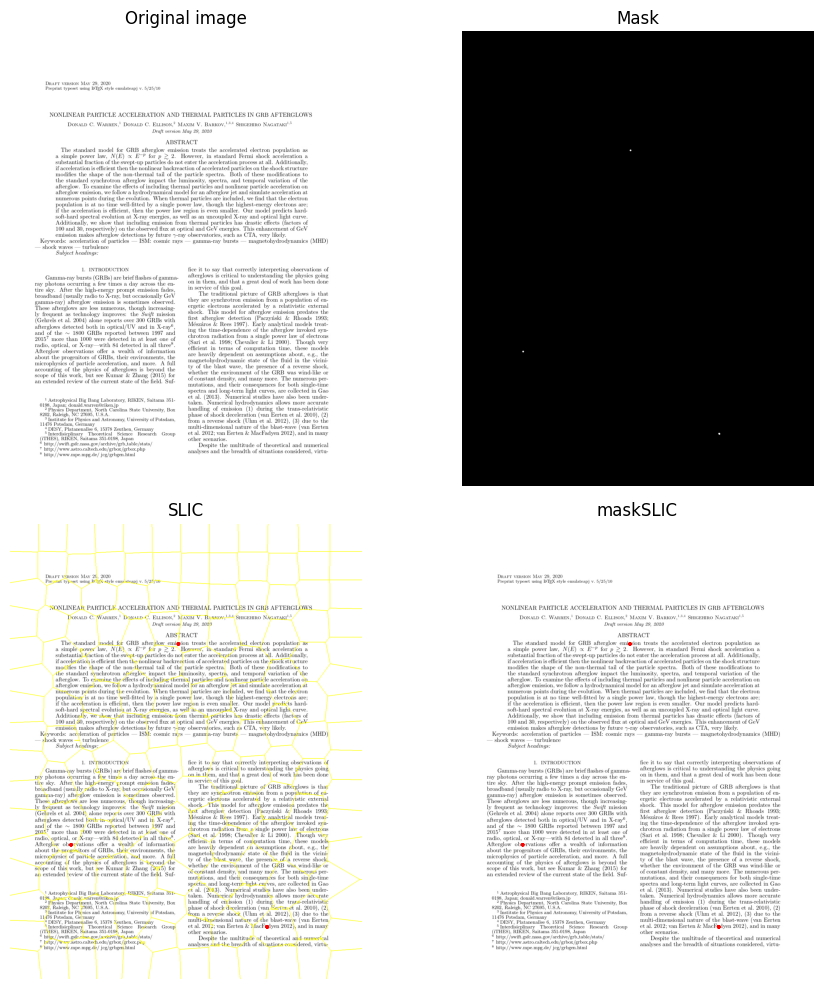

In [49]:



values = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for i in values:
    
    try:
        
        # Input data
        img = io.imread('./../../data/images/docbank_test_page-0001.jpg')
        lum = color.rgb2gray(img)
#         lum = binarize_image(img)
        mask = morphology.remove_small_holes(
            morphology.remove_small_objects(
                lum < i,3),
            3)

        mask = morphology.opening(mask, morphology.disk(3))

        # SLIC result
        slic = segmentation.slic(img, n_segments=200, start_label=1)

        # maskSLIC result
        m_slic = segmentation.slic(img, n_segments=100, mask=mask, start_label=1)
        print("Success : ",str(i))
        display_result(img, mask, slic, m_slic)
    except:
        print(i)

### Example

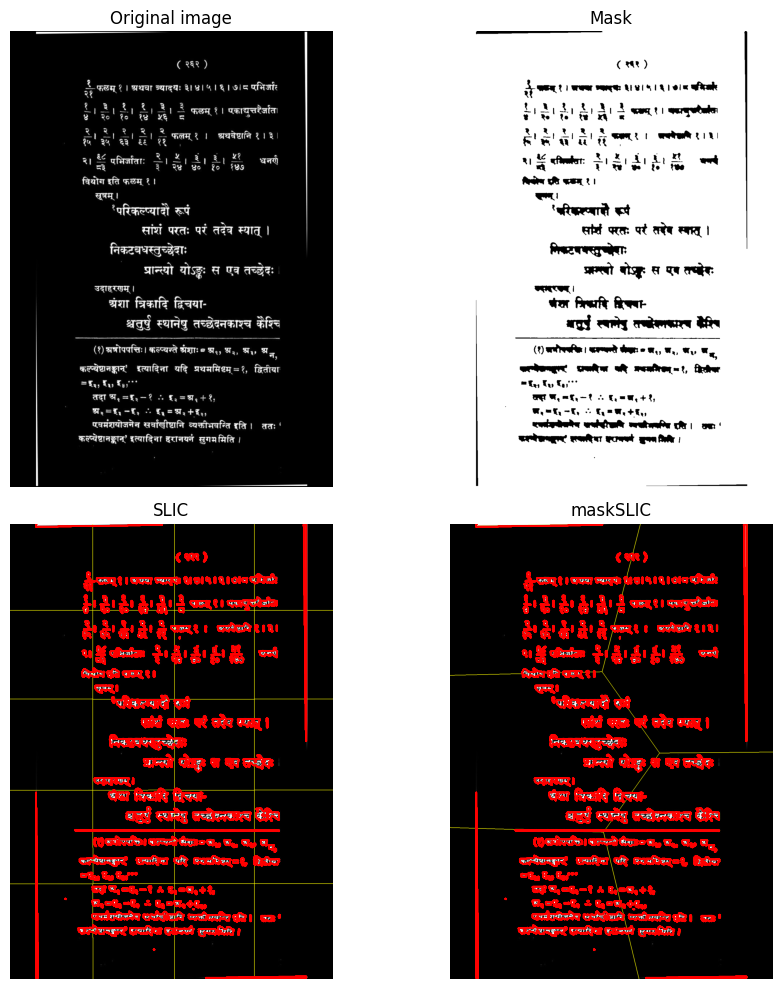

In [14]:


# Input data
img = io.imread('./../../data/sample_data/sanbook_page-0001.jpg')
img = invert(img)

# Compute a mask
lum = color.rgb2gray(img)
mask = morphology.remove_small_holes(
    morphology.remove_small_objects(
        lum < 0.3, 5),
    5)

mask = morphology.opening(mask, morphology.disk(3))

# SLIC result
slic = segmentation.slic(img, n_segments=20, start_label=1, compactness=10000)

# maskSLIC result
m_slic = segmentation.slic(img, n_segments=5, mask=mask, start_label=1)

